In [ ]:
#Basic Analytics packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

#Data preprocessing and metrics
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix , silhouette_score , mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#Model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mediscan/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
df.shape

(9134, 24)

In [ ]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
df.describe

<bound method NDFrame.describe of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor  

In [ ]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

It shows that there is no null values so we can go for further process

In [ ]:
print(f'No of duplicate rows:{df.duplicated().sum()}')

No of duplicate rows:0


It Indicates that there is no duplicate values in the taken dataset

In [ ]:
num_columns = [column for column in df.columns if df[column].dtype != 'object' ]
object_columns = [column for column in df.columns if df[column].dtype == 'object' ]
print(f'Integer Columns:{num_columns}')
print(f'Object Columns:{object_columns}')

Integer Columns:['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']
Object Columns:['Customer', 'State', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']


In [ ]:
print('Unique values in each object columns')
for i in object_columns:
  print(f'{i} : {df[i].unique()}')

Unique values in each object columns
Customer : ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
State : ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Response : ['No' 'Yes']
Coverage : ['Basic' 'Extended' 'Premium']
Education : ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Effective To Date : ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
EmploymentStatus : ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retire



*   We need to change the M -> Male and F -> Female
*   The Policy column has only three values so we need to convert this
*   In vechile class we are changing the Luxury suv -> SUV
*   In vechile size we are changing the medisize -> Medium
*   We are changing the Effective to date to Data datatype



In [ ]:
df['Gender'] = df['Gender'].str.replace('M','Male')
df['Gender'] = df['Gender'].str.replace('F' , 'Female')
df['Policy'] = df['Policy'].str.replace('Corporate L3' , 'Corporate')
df['Policy'] = df['Policy'].str.replace('Corporate L2' , 'Corporate')
df['Policy'] = df['Policy'].str.replace('Corporate L1' , 'Corporate')
df['Policy'] = df['Policy'].str.replace('Personal L3' , 'Personal')
df['Policy'] = df['Policy'].str.replace('Personal L2' , 'Personal')
df['Policy'] = df['Policy'].str.replace('Personal L1' , 'Personal')
df['Policy'] = df['Policy'].str.replace('Special L3' , 'Special')
df['Policy'] = df['Policy'].str.replace('Special L2' , 'Special')
df['Policy'] = df['Policy'].str.replace('Special L1' , 'Special')
df['Vehicle Class'] = df['Vehicle Class'].str.replace('Luxury SUV' , 'SUV')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,Female,56274,...,5,0,1,Corporate Auto,Corporate,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,Female,0,...,42,0,8,Personal Auto,Personal,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,Female,48767,...,38,0,2,Personal Auto,Personal,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,Male,0,...,65,0,7,Corporate Auto,Corporate,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,Male,43836,...,44,0,1,Personal Auto,Personal,Offer1,Agent,138.130879,Four-Door Car,Medsize


***Changing the Object to data type***

In [ ]:
column = 'Effective To Date'
print(f'Before Conversion:{df[column].dtype}')
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])
print(f'After Conversion:{df[column].dtype}')


Before Conversion:object
After Conversion:datetime64[ns]


# Charts and analysing

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64


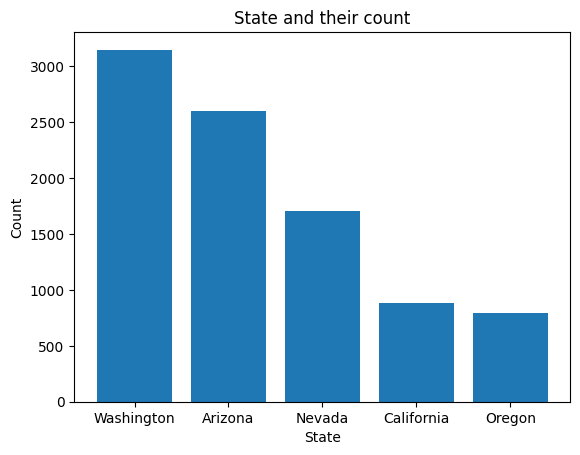

In [ ]:
print( df["State"].value_counts())
plt.bar(df["State"].unique() , df["State"].value_counts())
plt.title("State and their count")
plt.ylabel("Count")
plt.xlabel("State")
plt.show()

No     7826
Yes    1308
Name: Response, dtype: int64


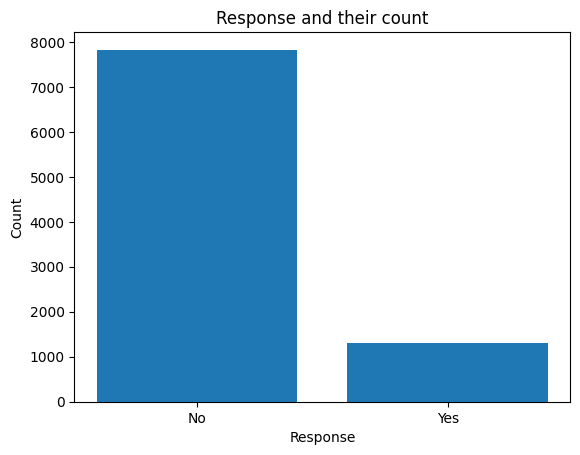

In [ ]:
print( df["Response"].value_counts())
plt.bar(df["Response"].unique() , df["Response"].value_counts())
plt.title("Response and their count")
plt.ylabel("Count")
plt.xlabel("Response")
plt.show()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64


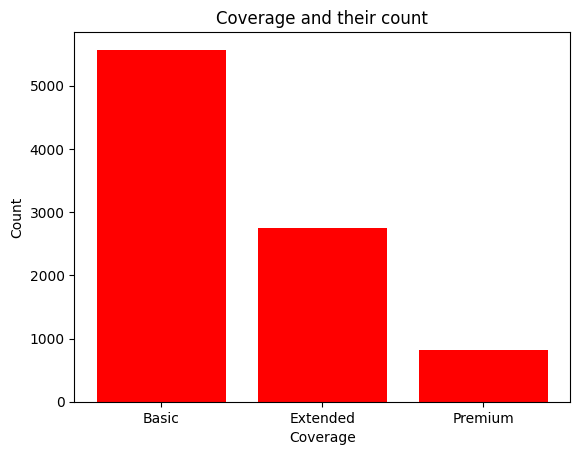

In [ ]:
print( df["Coverage"].value_counts())
plt.bar(df["Coverage"].unique() , df["Coverage"].value_counts() , color = "red")
plt.title("Coverage and their count")
plt.ylabel("Count")
plt.xlabel("Coverage")
plt.show()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64


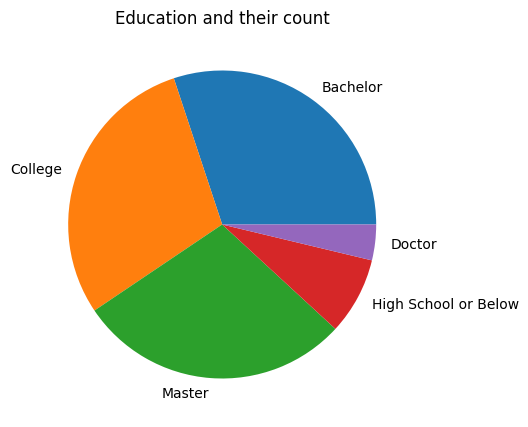

In [ ]:
print( df["Education"].value_counts())
plt.figure(figsize = (10 , 5))
plt.pie(df["Education"].value_counts() , labels = df["Education"].unique())
plt.title("Education and their count")
plt.show()

Female    4658
Male      4476
Name: Gender, dtype: int64


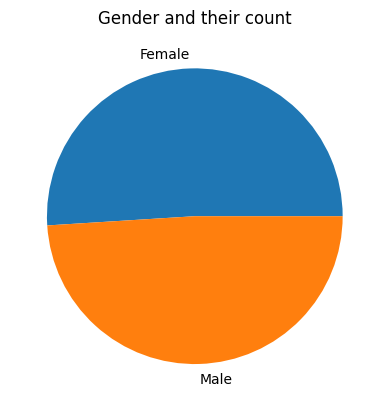

In [ ]:
print( df["Gender"].value_counts())
plt.pie(df["Gender"].value_counts() , labels = df["Gender"].unique())
plt.title("Gender and their count")
plt.show()

Personal     6788
Corporate    1968
Special       378
Name: Policy, dtype: int64


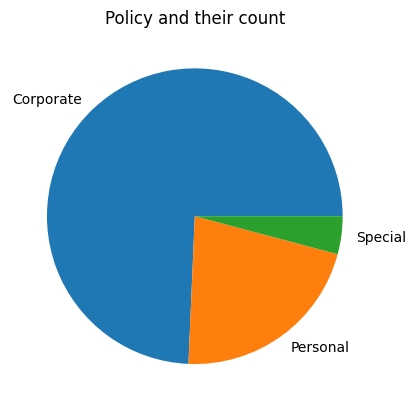

In [ ]:
print(df["Policy"].value_counts())
plt.pie(df["Policy"].value_counts() , labels = df["Policy"].unique())
plt.title("Policy and their count")
plt.show()

# Distribution

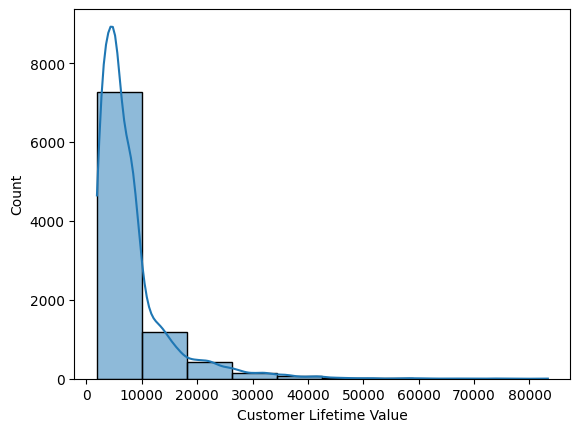

In [ ]:
sns.histplot(df['Customer Lifetime Value'], kde=True, bins=10)
plt.show()

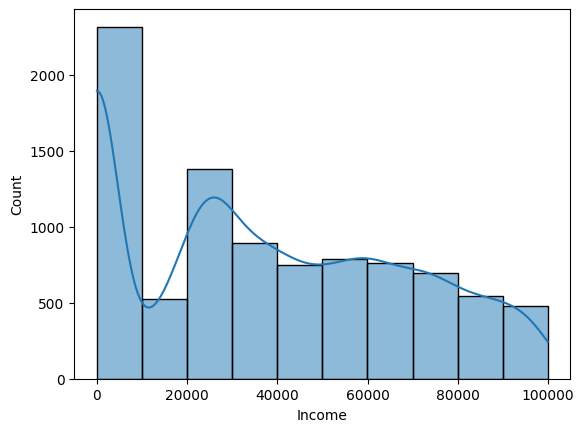

In [ ]:
sns.histplot(df['Income'], kde=True, bins=10)
plt.show()

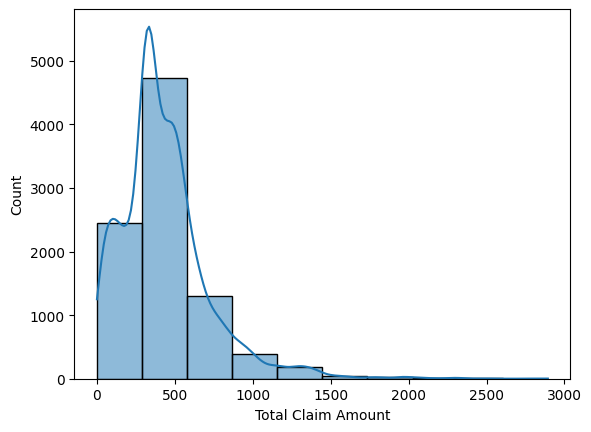

In [ ]:
sns.histplot(df['Total Claim Amount'], kde=True, bins=10)
plt.show()

#  Encoding label variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in [column for column in df.columns if df[column].dtype == 'object']:
  df[i] = encoder.fit_transform(df[i])

df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,600,4,2763.519279,0,0,0,2011-02-24,1,0,56274,...,5,0,1,0,0,0,0,384.811147,4,1
1,5946,0,6979.535903,0,1,0,2011-01-31,4,0,0,...,42,0,8,1,1,2,0,1131.464935,0,1
2,96,2,12887.431650,0,2,0,2011-02-19,1,0,48767,...,38,0,2,1,1,0,0,566.472247,4,1
3,8016,1,7645.861827,0,0,0,2011-01-20,4,1,0,...,65,0,7,0,0,0,2,529.881344,2,1
4,2488,4,2813.692575,0,0,0,2011-02-03,1,1,43836,...,44,0,1,1,1,0,0,138.130879,0,1


# Outlier analysis

Text(0, 0.5, 'Outliers')

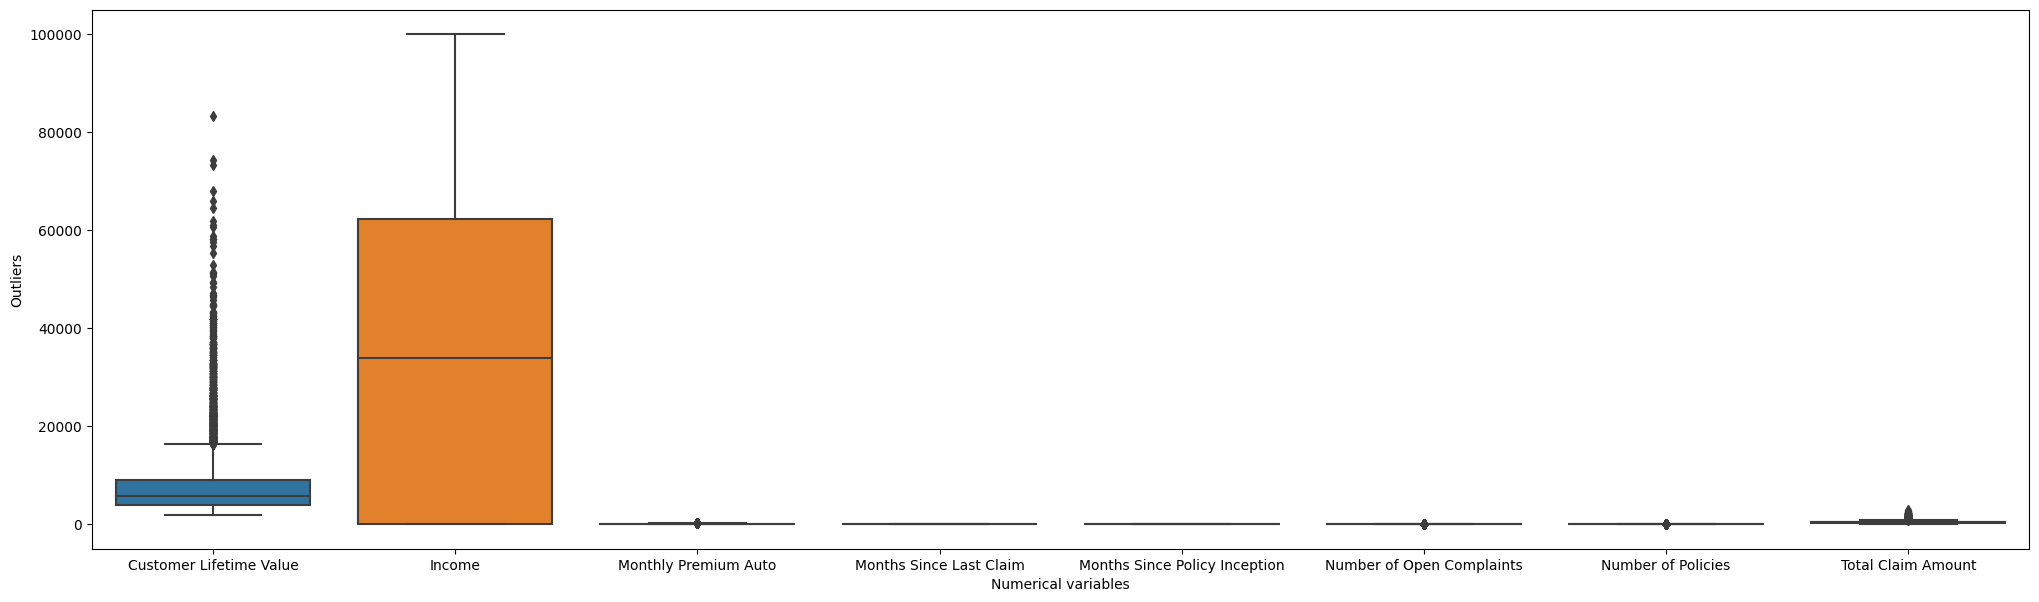

In [ ]:
# Numerical Variables
plt.figure(figsize = (25, 7))
sns.boxplot(df[num_columns])
plt.xlabel('Numerical variables')
plt.ylabel('Outliers')

Text(0, 0.5, 'Outliers')

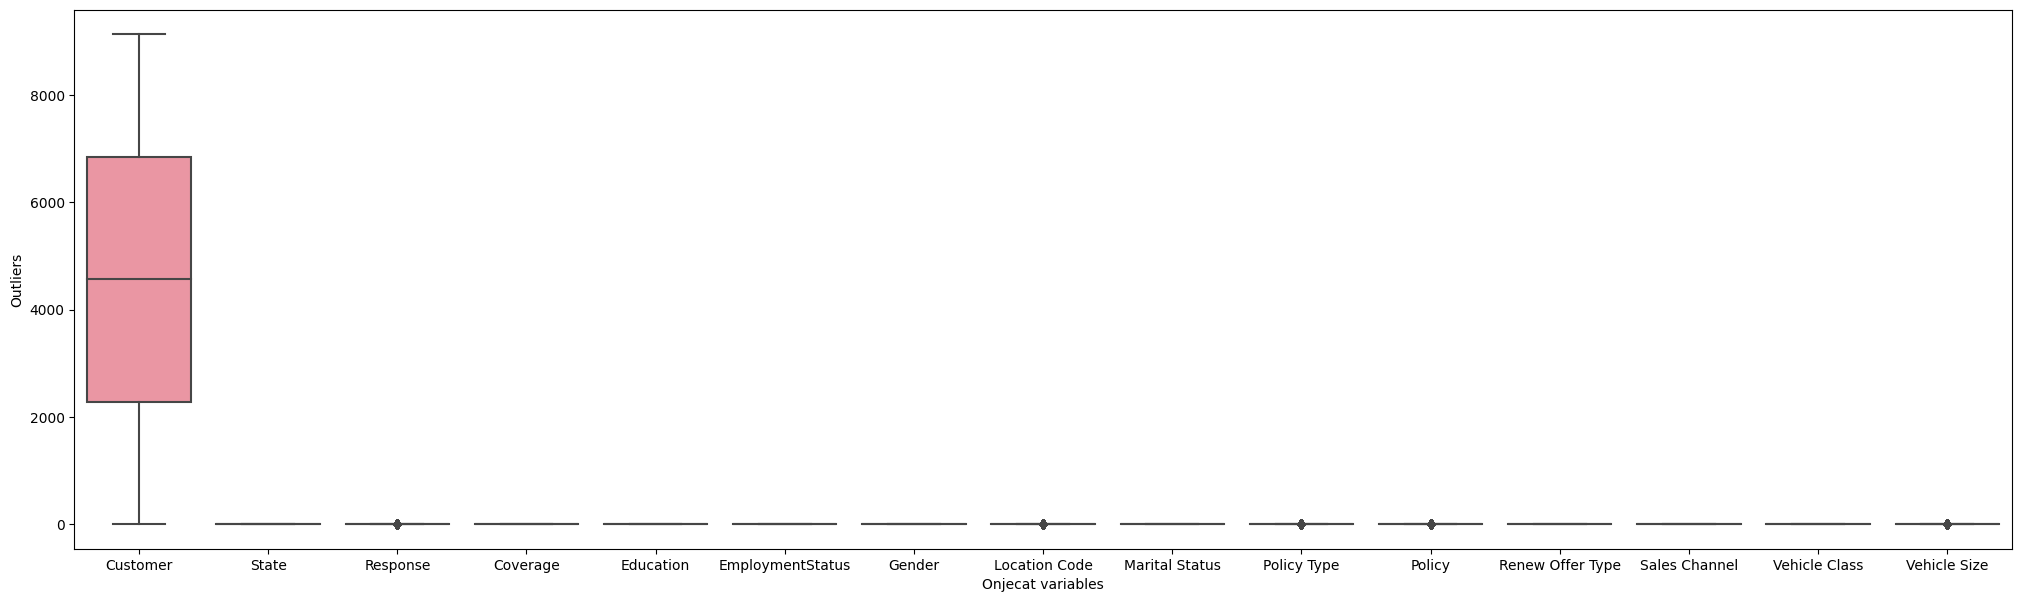

In [ ]:
# Object vairables
plt.figure(figsize = (25, 7))
sns.boxplot(df[object_columns])
plt.xlabel('Onjecat variables')
plt.ylabel('Outliers')



*   We have notices that the columns '**Cusotmer Life value**' & '**Total claim amount**' has outlier.
*   So we need to change the outlier using interquartile method



In [ ]:
#Outlier imputing
outlier_columns = ['Customer Lifetime Value' , 'Total Claim Amount']

train = df[outlier_columns]
def impute_outliers(data, column, factor):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr

    data_copy = data.copy()
    data_copy[column] = np.where(data_copy[column] < lower_bound, np.nan, data_copy[column])
    data_copy[column] = np.where(data_copy[column] > upper_bound, np.nan, data_copy[column])

    imputer = SimpleImputer(strategy="mean")
    data_imputed = imputer.fit_transform(data_copy)

    return pd.DataFrame(data_imputed, columns=data.columns)

for column in outlier_columns:
    train = impute_outliers(train, column, 1.5)
df[outlier_columns] = train


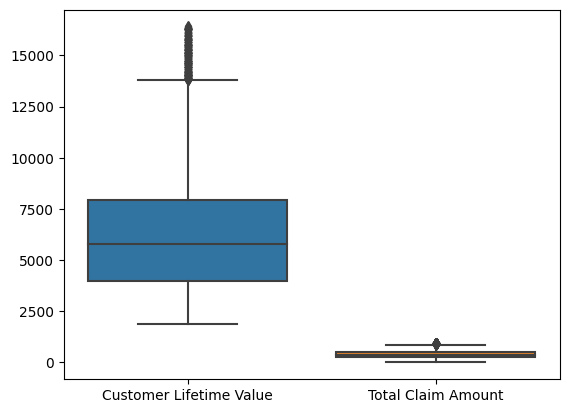

In [ ]:
#Column values after impute the outliers
sns.boxplot(df[outlier_columns])
plt.show()

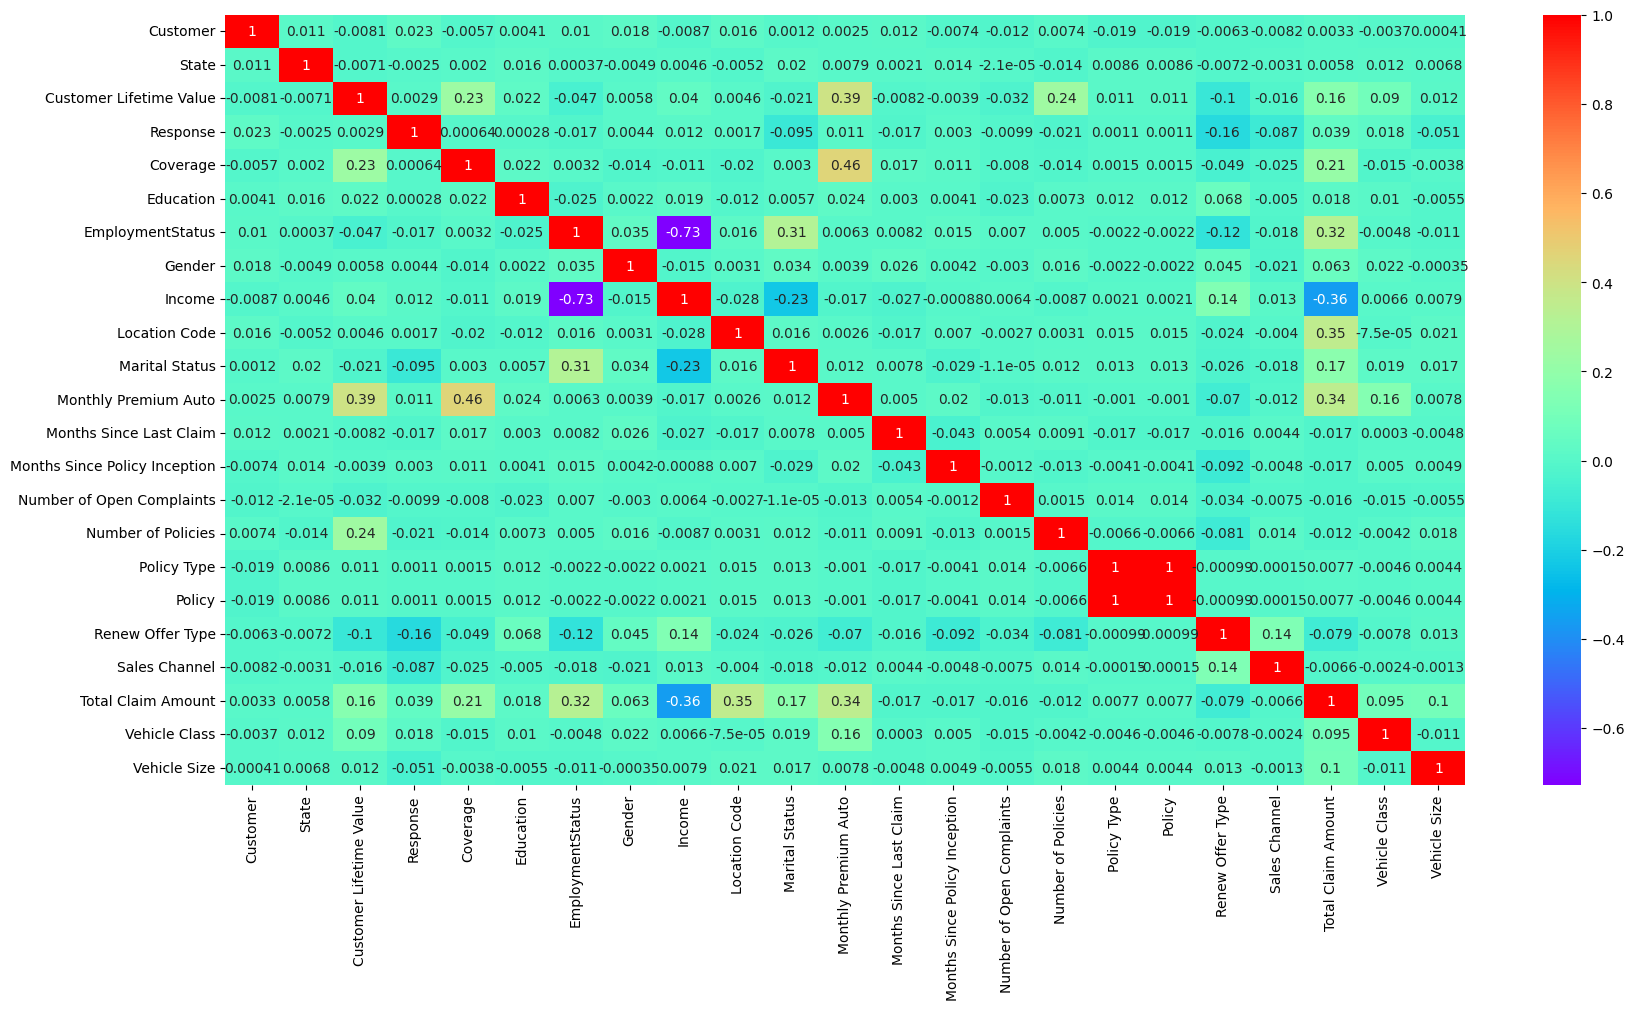

In [ ]:
#Correlation
corr = df.corr()
plt.figure(figsize = (20 , 10))
sns.heatmap(corr , annot = True , cmap = 'rainbow')
plt.show()

Here we notice that some variables are negatively correlated with the Y variable so we are going to drop the Variables.

In [ ]:
negatively_correlated_columns = corr['Customer Lifetime Value'][corr['Customer Lifetime Value'] < 0].index
data = df.drop(negatively_correlated_columns , axis = 1)
data.head()

,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Gender,Income,Location Code,Monthly Premium Auto,Number of Policies,Policy Type,Policy,Total Claim Amount,Vehicle Class,Vehicle Size
0,2763.519279,0,0,0,2011-02-24,0,56274,1,69,1,0,0,384.811147,4,1
1,6979.535903,0,1,0,2011-01-31,0,0,1,94,8,1,1,390.034963,0,1
2,12887.431650,0,2,0,2011-02-19,0,48767,1,108,2,1,1,566.472247,4,1
3,7645.861827,0,0,0,2011-01-20,1,0,1,106,7,0,0,529.881344,2,1
4,2813.692575,0,0,0,2011-02-03,1,43836,0,73,1,1,1,138.130879,0,1


# Model Fitting

In [ ]:
X , y = data.drop(['Customer Lifetime Value' , 'Effective To Date'] , axis = 1) , df['Customer Lifetime Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X train:{X_train.shape}')
print(f'Y train:{y_train.shape}')
print(f'X test:{X_test.shape}')
print(f'Y test:{y_test.shape}')

X train:(7307, 13)
Y train:(7307,)
X test:(1827, 13)
Y test:(1827,)


# Regression

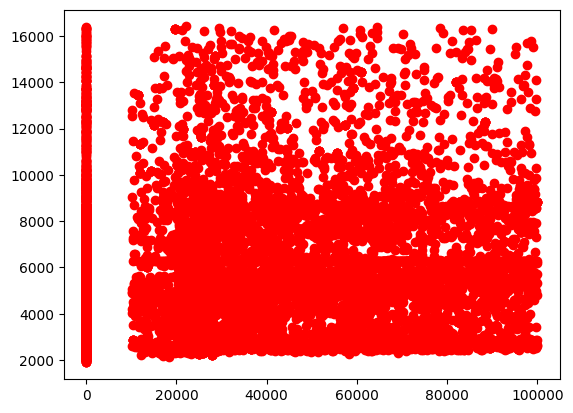

In [ ]:
plt.scatter(data['Income'] ,df['Customer Lifetime Value'] , color = 'red')
plt.show()

In [ ]:
# Polynomial Regression
poly_degree = 2
poly_features = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions on the test set
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Polynomial Regression Mean Squared Error:", mse_poly)

Polynomial Regression Mean Squared Error: 5594047.045132721


In [ ]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error:", mse_linear)

Linear Regression Mean Squared Error: 7290434.118817561


# Clustering

In [ ]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
wealth_columns = ['Customer Lifetime Value','Total Claim Amount', 'Income' , 'Monthly Premium Auto' , 'Months Since Policy Inception' , 'Number of Policies']
df_cluster = df[wealth_columns]
df_cluster.head()

,Customer Lifetime Value,Total Claim Amount,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies
0,2763.519279,384.811147,56274,69,5,1
1,6979.535903,390.034963,0,94,42,8
2,12887.431650,566.472247,48767,108,38,2
3,7645.861827,529.881344,0,106,65,7
4,2813.692575,138.130879,43836,73,44,1


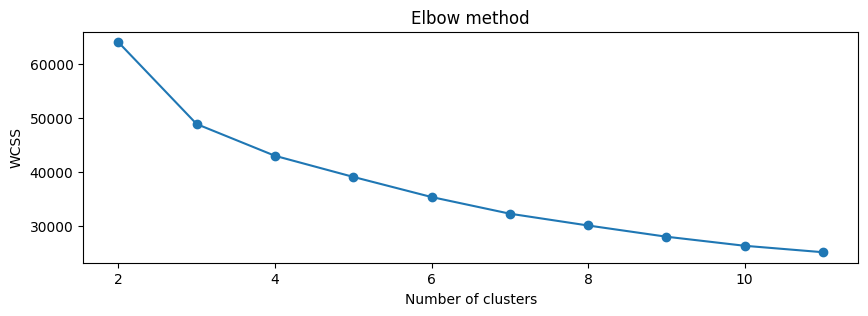

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

#Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42 , n_init = 10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10 ,3))
plt.plot(range(2, 12), wcss, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow method")
plt.show()

In [ ]:
k_opt = 3
kmeans_opt = KMeans(n_clusters=k_opt, random_state=42 , n_init = 10)
kmeans_opt.fit(train)

# Assign the cluster labels to the data set
df_cluster["Cluster"] = kmeans_opt.labels_
df_cluster.groupby('Cluster').mean()

,Customer Lifetime Value,Total Claim Amount,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies
Cluster,,,,,,
0,3777.392212,366.294262,36130.665155,80.863723,47.889737,2.209785
1,12653.141099,459.441407,38645.081256,118.771006,47.643583,2.761773
2,7206.264099,396.330316,39037.140378,99.460502,48.372442,3.844341


From that we are creating cluster for identifing the potential cusotmers with theri Total claim amount , Income , No of policies etc..


*   Cluster 1 -> Highly potential customers
*   Cluster 2 -> Medium Potential customers
*   Cluster 0 -> Low Potential cusotmers




# Classification

Since the data is non linearly spread we are using Decision tree and ANN for classification

In [ ]:
X = df_cluster.drop('Cluster' , axis = 1)
y = df_cluster['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X train:{X_train.shape}')
print(f'Y train:{y_train.shape}')
print(f'X test:{X_test.shape}')
print(f'Y test:{y_test.shape}')

X train:(7307, 6)
Y train:(7307,)
X test:(1827, 6)
Y test:(1827,)


In [ ]:
# Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train_poly, y_train)

# Predictions on the test set
y_pred_tree = tree_classifier.predict(X_test_poly)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree)


# Print Accuracy and Classification Report
print("Decision Tree Accuracy:", accuracy_tree)
print("Classification Report:\n", classification_rep_tree)

Decision Tree Accuracy: 0.8850574712643678
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       869
           1       0.58      0.63      0.60       209
           2       0.86      0.86      0.86       749

    accuracy                           0.89      1827
   macro avg       0.81      0.82      0.81      1827
weighted avg       0.89      0.89      0.89      1827



Confusin matrix:
[[845   0  24]
 [  0 131  78]
 [ 14  94 641]]


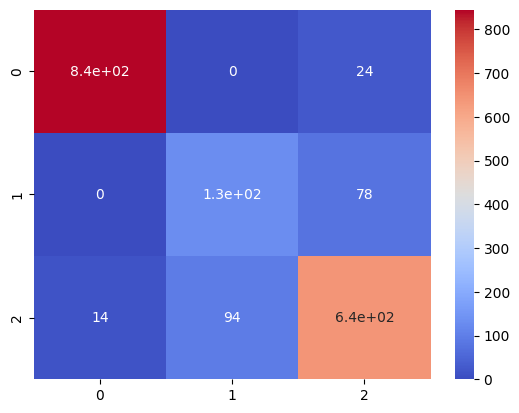

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_tree)
print(f'Confusin matrix:\n{conf_matrix}')
sns.heatmap(conf_matrix , annot = True , cmap = 'coolwarm')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print('RandomForestClassifier:')
model = RandomForestClassifier(random_state = 42)
model.fit(X_train , y_train)

y_predict = model.predict(X_test)

accuracy = accuracy_score(y_predict , y_test)
print(f'Accuracy : {accuracy:.2f}')

print(classification_report(y_test , y_predict))

RandomForestClassifier:
Accuracy : 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           1       1.00      1.00      1.00       209
           2       1.00      1.00      1.00       749

    accuracy                           1.00      1827
   macro avg       1.00      1.00      1.00      1827
weighted avg       1.00      1.00      1.00      1827



Confusin matrix:
[[868   0   1]
 [  0 209   0]
 [  0   0 749]]


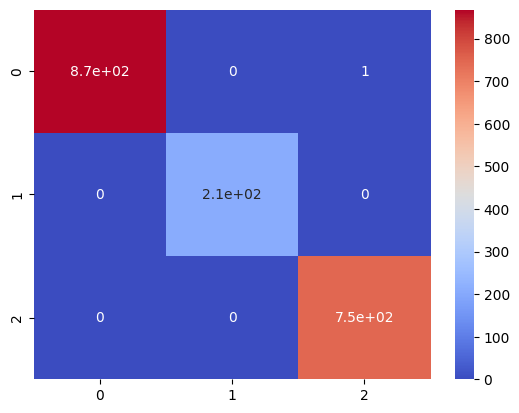

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predict)
print(f'Confusin matrix:\n{conf_matrix}')
sns.heatmap(conf_matrix , annot = True , cmap = 'coolwarm')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#ANN
model = Sequential()

model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_ann = (model.predict(X_test) > 0.3).astype("int32")


accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f'ANN Accuracy: {accuracy_ann}')

print('Classification Report:')
print(classification_report(y_test, y_pred_ann))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_ann))

Epoch 1/10
183/183 [==============================] - 6s 10ms/step - loss: -31.5871 - accuracy: 0.5044 - val_loss: -140.8630 - val_accuracy: 0.5383
Epoch 2/10
183/183 [==============================] - 1s 4ms/step - loss: -603.1736 - accuracy: 0.5434 - val_loss: -1405.9448 - val_accuracy: 0.5520
Epoch 3/10
183/183 [==============================] - 1s 4ms/step - loss: -2930.5376 - accuracy: 0.5500 - val_loss: -5086.7207 - val_accuracy: 0.5540
Epoch 4/10
183/183 [==============================] - 1s 3ms/step - loss: -8151.5933 - accuracy: 0.5526 - val_loss: -12176.4844 - val_accuracy: 0.5527
Epoch 5/10
183/183 [==============================] - 0s 3ms/step - loss: -17149.8301 - accuracy: 0.5535 - val_loss: -23511.3438 - val_accuracy: 0.5527
Epoch 6/10
183/183 [==============================] - 1s 3ms/step - loss: -30526.0352 - accuracy: 0.5536 - val_loss: -39501.1445 - val_accuracy: 0.5527
Epoch 7/10
183/183 [==============================] - 1s 3ms/step - loss: -48925.1211 - accuracy: 

Confusin matrix:
[[838  31   0]
 [  0 209   0]
 [  0 749   0]]


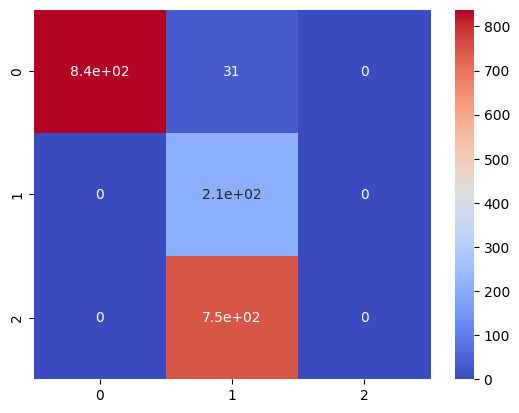

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_ann)
print(f'Confusin matrix:\n{conf_matrix}')
sns.heatmap(conf_matrix , annot = True , cmap = 'coolwarm')
plt.show()